In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Minh-Nguyen-0401/Data-Analytics-Competitions/main/HPG%20Historical%20Data.csv',index_col="Date",parse_dates=True)

In [3]:
df['Price'] = df['Price'].str.replace(',','')
df['Open'] = df['Open'].str.replace(',','')
df['High'] = df['High'].str.replace(',','')
df['Low'] = df['Low'].str.replace(',','')
df['Vol.'] = df['Vol.'].str.replace('.','')
df['Vol.'] = df['Vol.'].str.replace('M','')
df['Change %'] = df['Change %'].str.replace('%','')
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-03-31,18909.0,18909.0,19000.0,18500.0,2615,0.00
2023-03-30,18909.0,19091.0,19227.0,18864.0,2305,0.00
2023-03-29,18909.0,18818.0,19182.0,18818.0,1974,0.48
2023-03-28,18818.0,19000.0,19091.0,18818.0,1356,-0.48
2023-03-27,18909.0,18545.0,19000.0,18500.0,2229,1.96


In [4]:
df[ "Price"] = df[ "Price"].astype("float")
df[ "Open"] = df[ "Open"].astype("float")
df[ "High"] = df[ "High"].astype("float")
df[ "Low"] = df[ "Low"].astype("float")
df[ "Vol."] = df[ "Vol."].astype("float")
df[ "Change %"] = df[ "Change %"].astype("float")


In [5]:
df[ "Vol."] = df[ "Vol."]*10000
df[ "Change %"] = df[ "Change %"]/100


In [6]:

df1 = df[df.index<"03/01/2022"]
df1=df1.asfreq('B')

df2= df[df.index>="03/01/2022"]
df2=df2.asfreq('B')

print("Display first 5 rows: "+"\n"+tabulate(df1.head(),headers="keys",tablefmt="pretty"))

print("\nDisplay last 5 rows: "+"\n"+(tabulate(df1.tail(),headers="keys",tablefmt="pretty")))

Display first 5 rows: 
+---------------------+---------+---------+---------+---------+------------+----------+
|        Date         |  Price  |  Open   |  High   |   Low   |    Vol.    | Change % |
+---------------------+---------+---------+---------+---------+------------+----------+
| 2018-01-02 00:00:00 | 11991.0 | 11789.9 | 12003.6 | 11676.8 | 15730000.0 |  0.0181  |
| 2018-01-03 00:00:00 | 11965.9 | 12066.4 | 12192.1 | 11890.5 | 18510000.0 | -0.0021  |
| 2018-01-04 00:00:00 | 12116.7 | 12016.2 | 12167.0 | 11965.9 | 17790000.0 |  0.0126  |
| 2018-01-05 00:00:00 | 12066.4 | 12091.6 | 12179.6 | 11978.4 | 14030000.0 | -0.0042  |
| 2018-01-08 00:00:00 | 12443.5 | 11991.0 | 12443.5 | 11940.7 | 14190000.0 |  0.0313  |
+---------------------+---------+---------+---------+---------+------------+----------+

Display last 5 rows: 
+---------------------+---------+---------+---------+---------+------------+----------------------+
|        Date         |  Price  |  Open   |  High   |   Low   

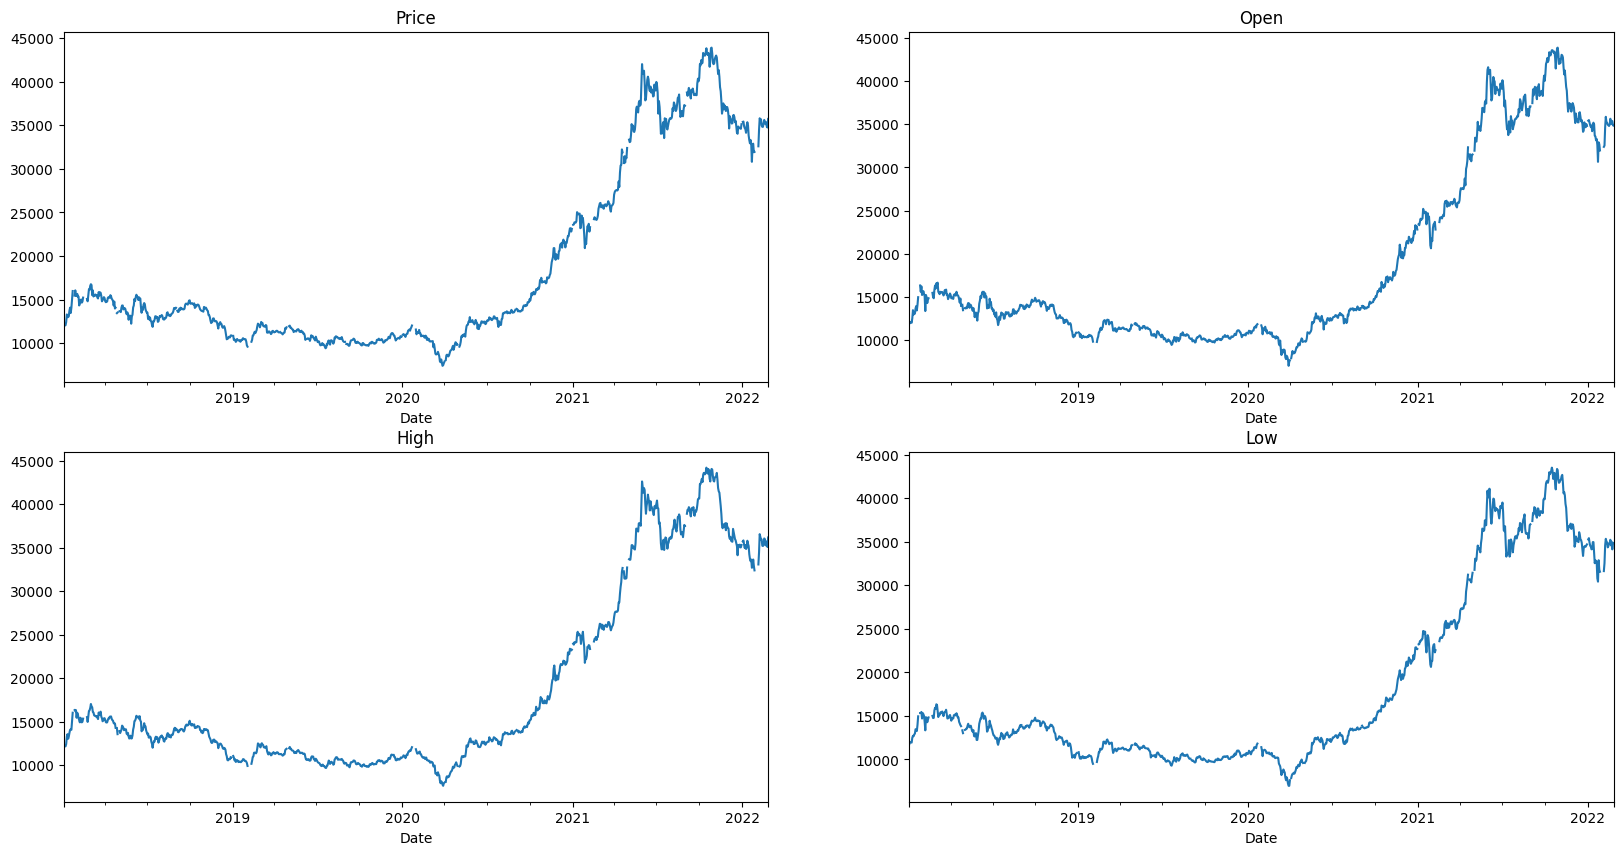

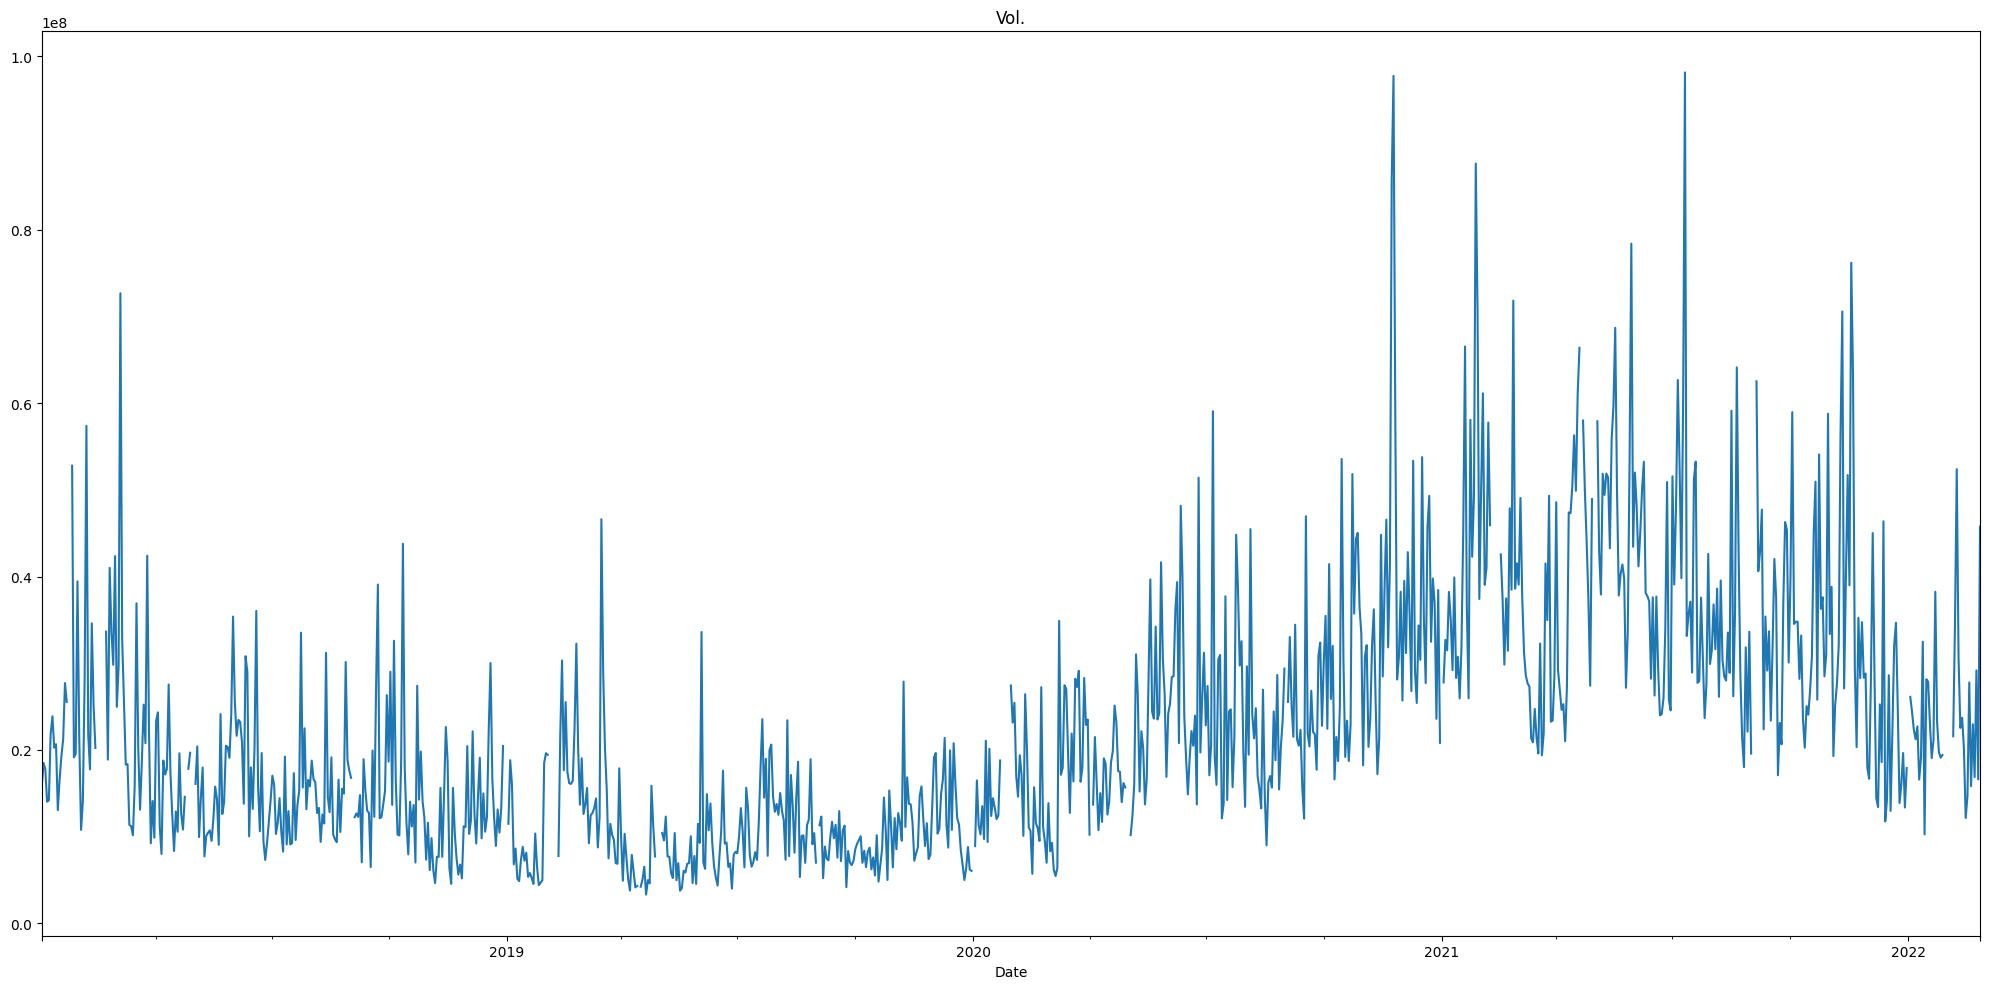

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

df1['Price'].plot(ax=axs[0,0])
axs[0,0].set_title('Price')

df1['Open'].plot(ax=axs[0,1])
axs[0,1].set_title('Open')

df1['High'].plot(ax=axs[1,0])
axs[1,0].set_title('High')

df1['Low'].plot(ax=axs[1,1])
axs[1,1].set_title('Low')

fig, ax_vol = plt.subplots(figsize=(20, 10))
df1['Vol.'].plot(ax=ax_vol)
ax_vol.set_title('Vol.')

plt.tight_layout()
plt.show()

## Run an ETS Decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

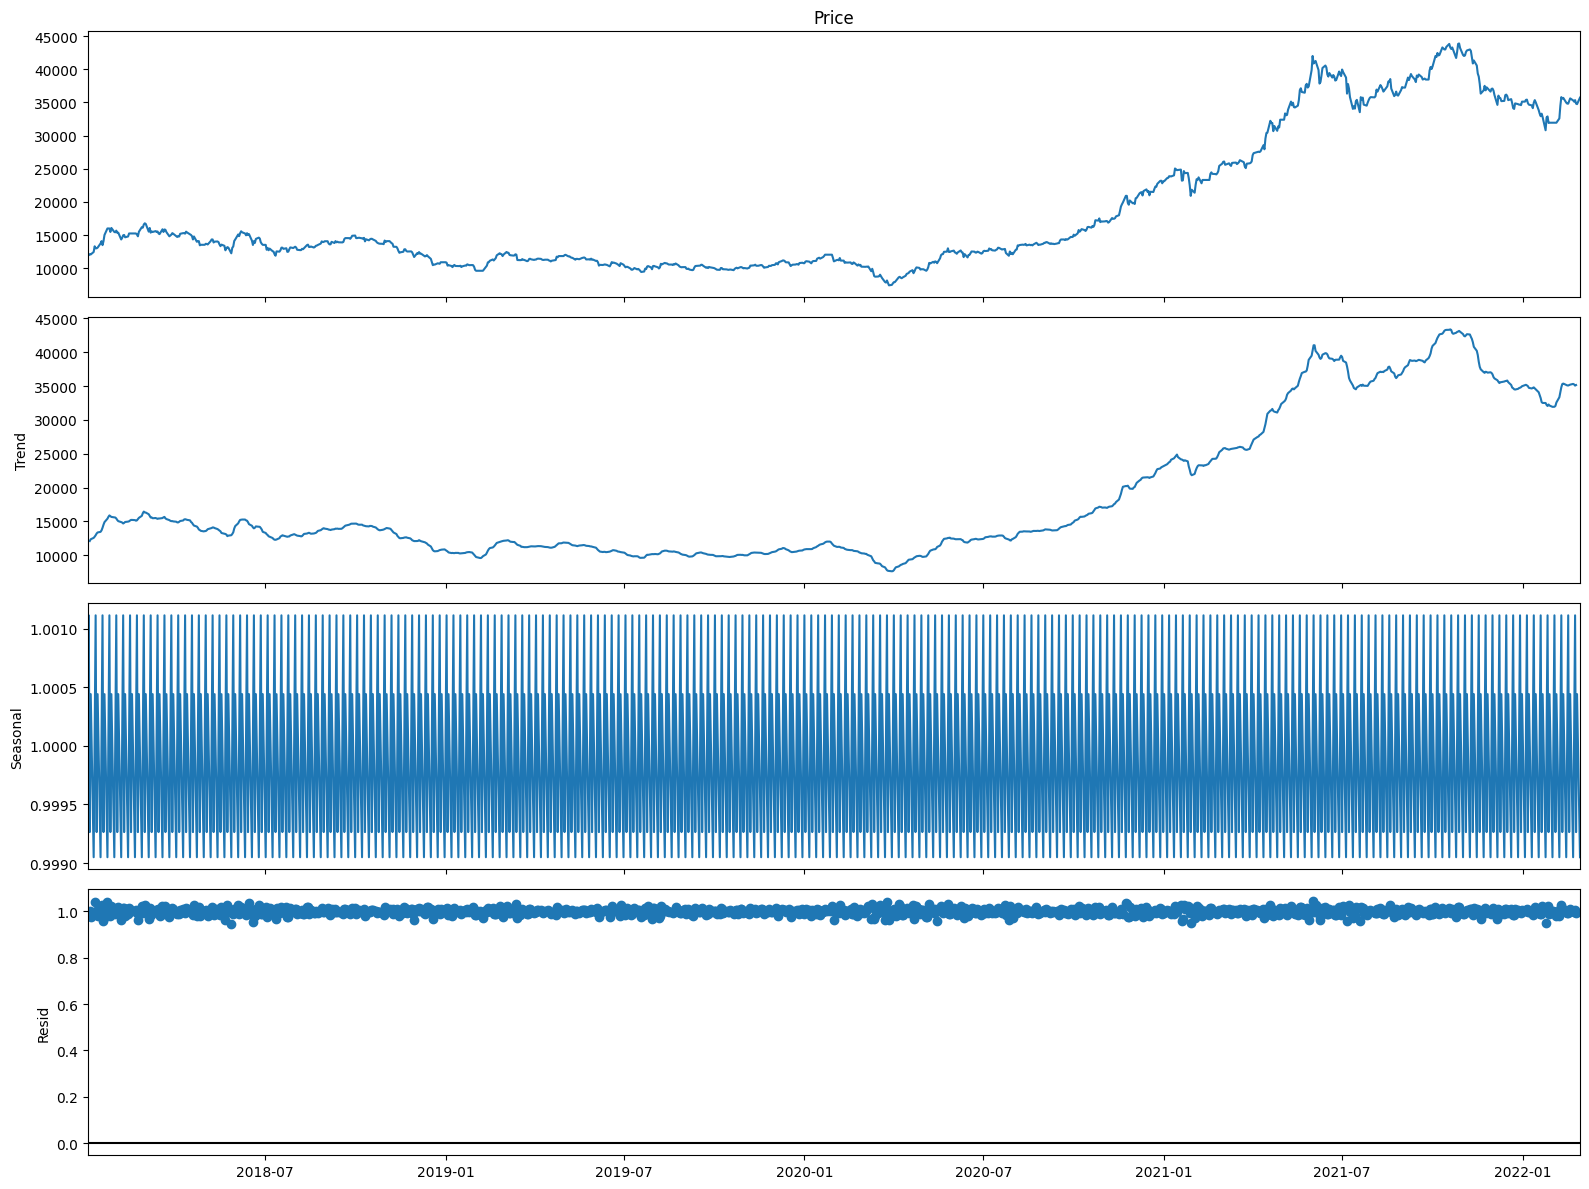

In [9]:
from pylab import rcParams

rcParams["figure.figsize"]=16,12

result = seasonal_decompose(df1["Price"].fillna(method="ffill"),model="multiplicative")
result.plot()
plt.show()

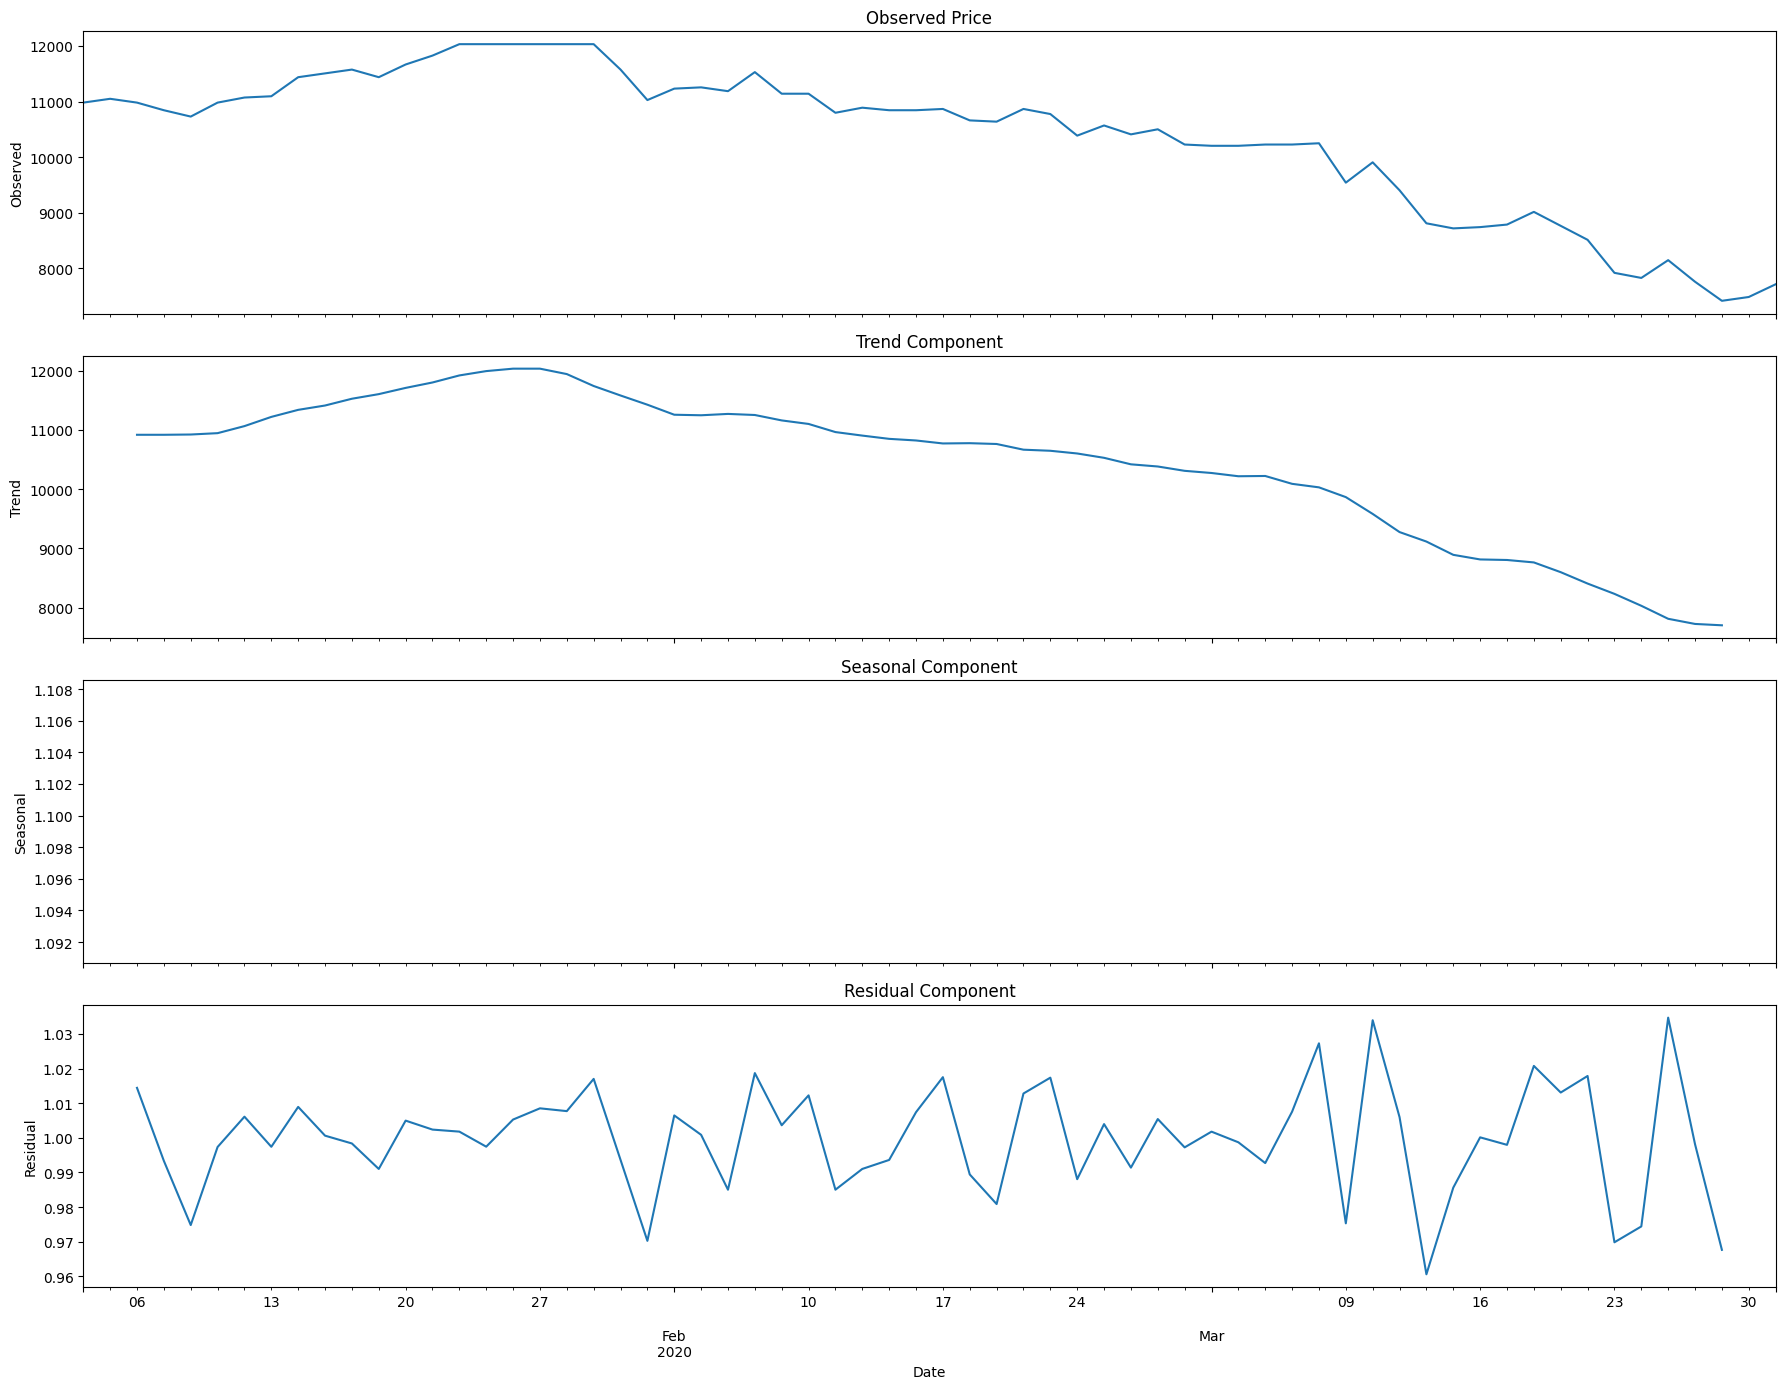

In [10]:

rcParams["figure.figsize"] = 18, 14

start_date = '2020-01-01'
end_date = '2020-03-31'
df1_zoomed = df1.loc[start_date:end_date]
df1_zoomed['Price'] = pd.to_numeric(df1_zoomed['Price'].fillna(method="ffill"), errors='coerce')
df1_zoomed.dropna(subset=['Price'], inplace=True)

result_zoomed = seasonal_decompose(df1_zoomed["Price"], model="multiplicative")

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)

result_zoomed.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Observed Price')

result_zoomed.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
ax2.set_title('Trend Component')

result_zoomed.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal Component')
ax3.set_ylim(result_zoomed.seasonal.min() * 1.1, result_zoomed.seasonal.max() * 1.1)  # Adjust the y-axis limits for clarity

result_zoomed.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_title('Residual Component')

plt.tight_layout()
plt.show()


## Test for stationarity

In [11]:
from statsmodels.tsa.stattools import ccovf,ccf
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [12]:
df1["Price"]=df1["Price"].fillna(method="ffill")

df2["Price"]=df2["Price"].fillna(method="ffill")

In [13]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [14]:
adf_test(df1["Price"])

Augmented Dickey-Fuller Test: 
ADF test statistic        -0.032357
p-value                    0.955773
# lags used               13.000000
# observations          1071.000000
critical value (1%)       -3.436470
critical value (5%)       -2.864242
critical value (10%)      -2.568209
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Text(0.5, 1.0, 'Quarterly Vol.')

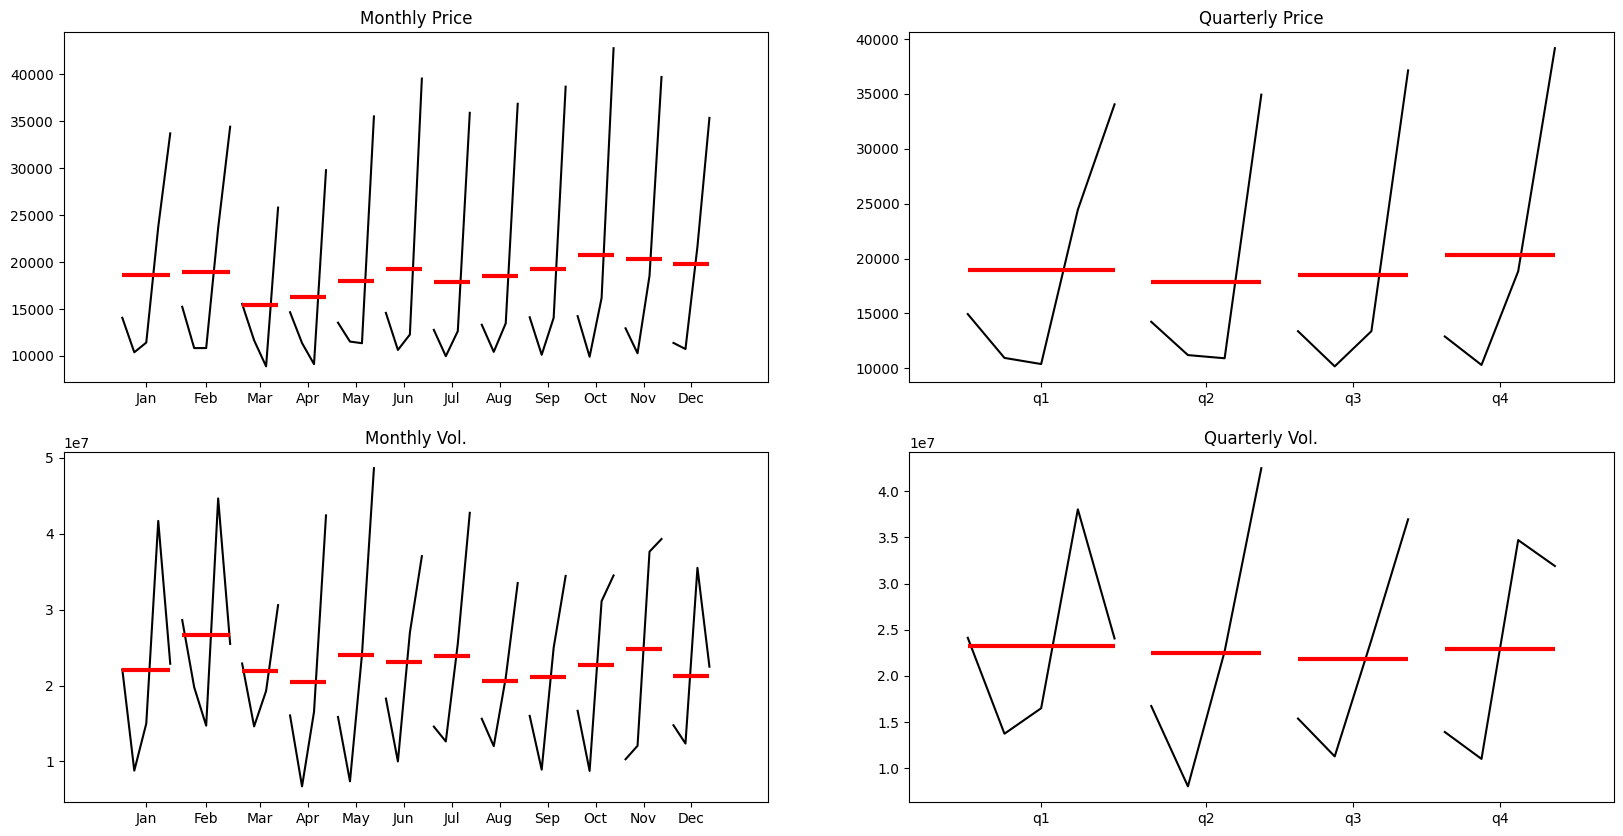

In [15]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

dfm=df1["Price"].resample(rule='M').mean()
dfq=df1["Price"].resample(rule='Q').mean()

dfmv=df1["Vol."].resample(rule='M').mean()
dfqv=df1["Vol."].resample(rule='Q').mean()

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

month_plot(dfm,ax=axs[0,0])
axs[0,0].set_title('Monthly Price')

quarter_plot(dfq,ax=axs[0,1])
axs[0,1].set_title('Quarterly Price')

month_plot(dfmv,ax=axs[1,0])
axs[1,0].set_title('Monthly Vol.')

quarter_plot(dfqv,ax=axs[1,1])
axs[1,1].set_title('Quarterly Vol.')


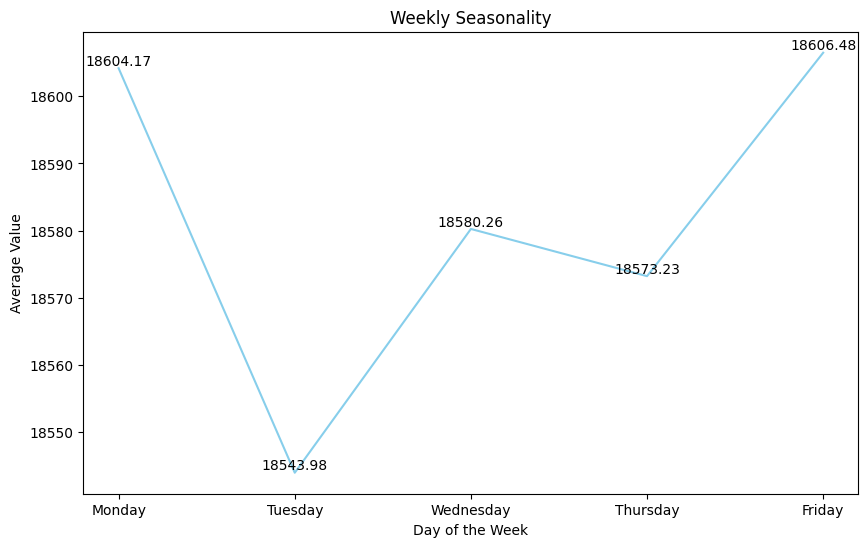

In [16]:
df1['DayOfWeek'] = df1.index.dayofweek

# Calculate the mean value for each day of the week
weekly_means = df1.groupby('DayOfWeek')['Price'].mean()  # replace 'Value' with your actual column name

# Plot the weekly means
plt.figure(figsize=(10, 6))
ax=weekly_means.plot(kind='line', color='skyblue')
plt.title('Weekly Seasonality')
plt.xlabel('Day of the Week')
plt.ylabel('Average Value')
plt.xticks(ticks=range(5), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

for x, y in zip(weekly_means.index, weekly_means):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

<Figure size 1400x800 with 0 Axes>

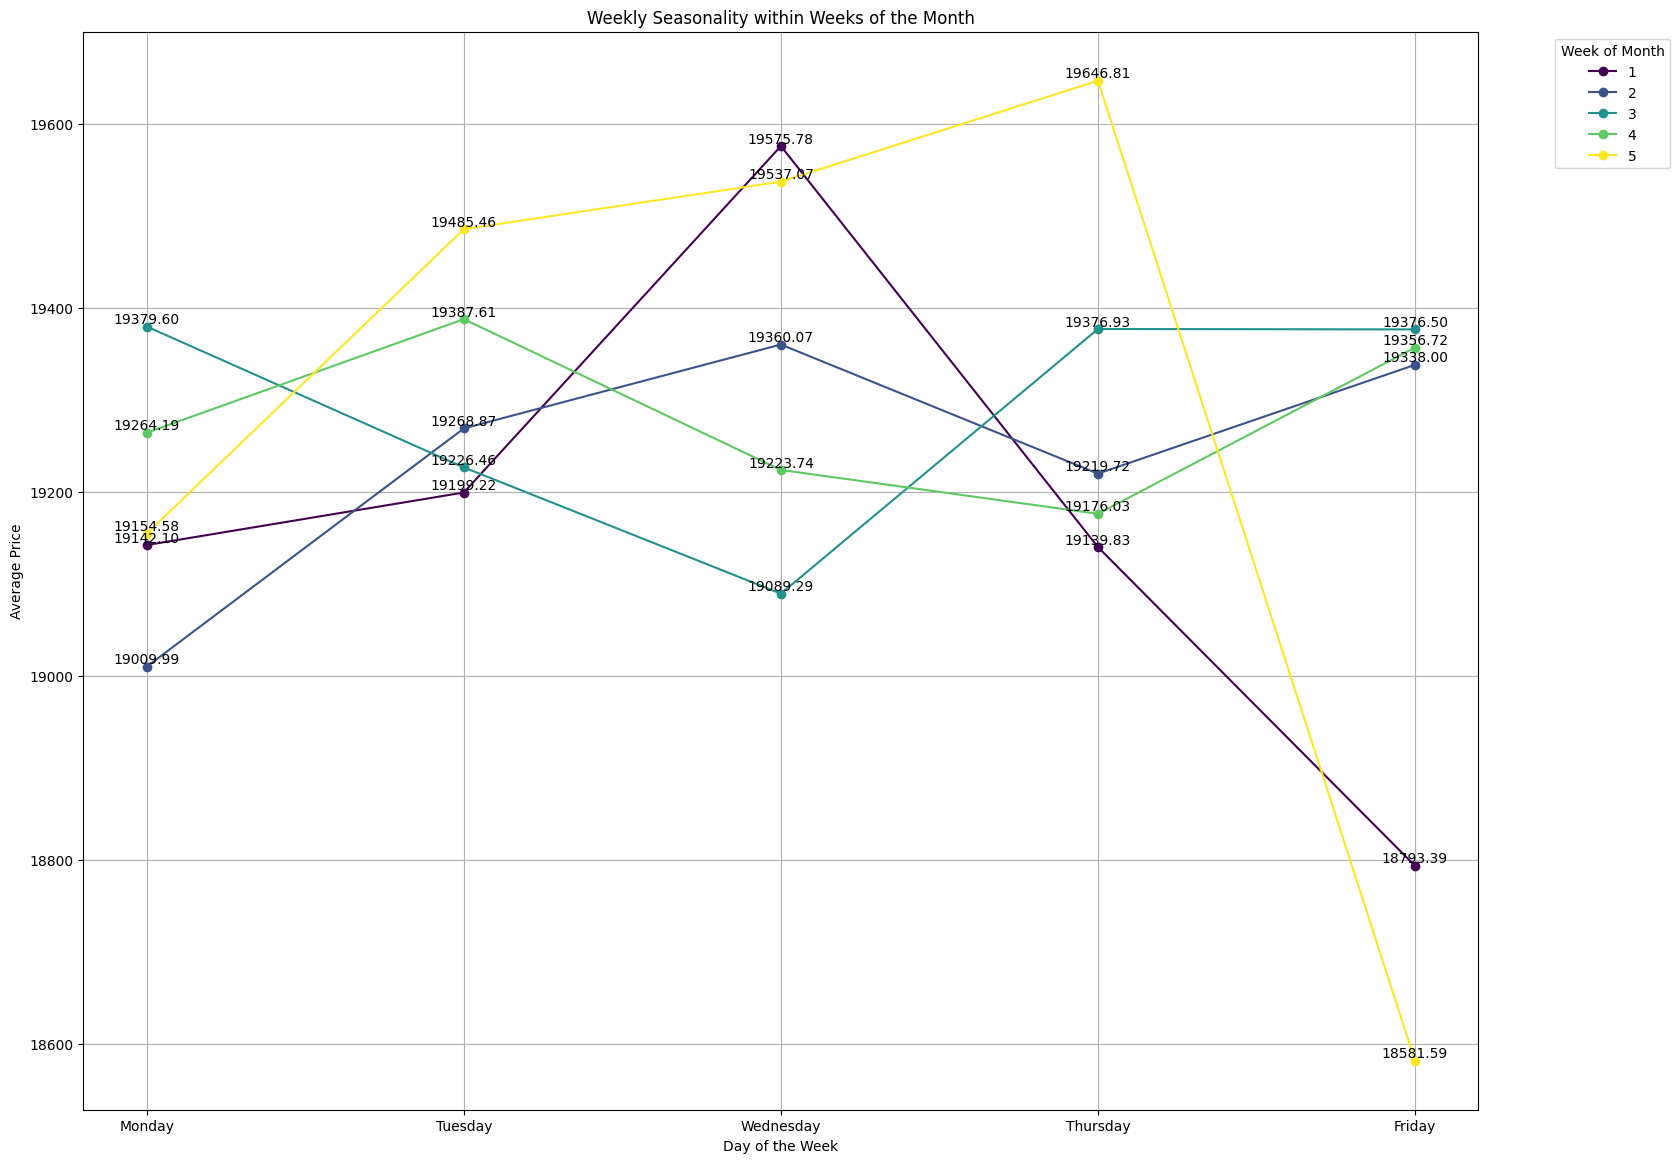

In [17]:
df['DayOfWeek'] = df.index.dayofweek
df['WeekOfMonth'] = df.index.to_series().apply(lambda x: (x.day - 1) // 7 + 1)

# Calculate the mean value for each day of the week for each week of the month
weekly_means = df.groupby(['WeekOfMonth', 'DayOfWeek'])['Price'].mean().unstack(level=0)

# Plot the weekly means for each week of the month
plt.figure(figsize=(14, 8))
ax = weekly_means.plot(kind='line', marker='o', colormap='viridis')
plt.title('Weekly Seasonality within Weeks of the Month')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.xticks(ticks=range(5), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.grid(True)

for col in weekly_means.columns:
    for x, y in zip(weekly_means.index, weekly_means[col]):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.legend(title='Week of Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As shown in the charts, there is conspicuously monthly and quarterly seasonality in terms of Stock Price over the examined period, while the weekly one requires further investigation

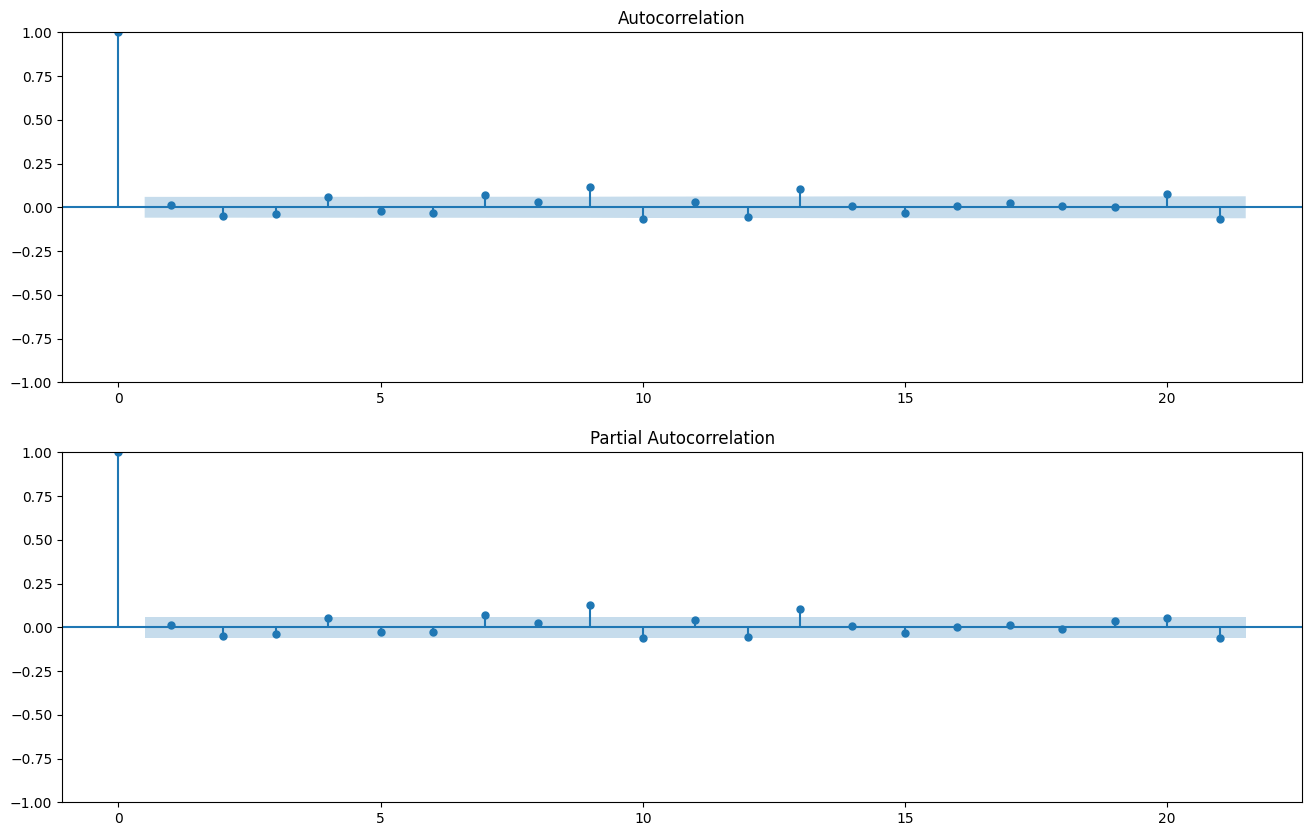

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,axs=plt.subplots(2,1,figsize=(16,10))

plot_acf(df1["Price"].diff().dropna(),lags=21,ax=axs[0])
plot_pacf(df1["Price"].diff().dropna(),lags=21,ax=axs[1])

plt.show()

**ACF Plot**: The significant spike at lag 1 followed by rapid decline to within the confidence intervals suggests an MA(1) process.

**PACF Plot**: The significant spike at lag 1 followed by rapid decline to within the confidence intervals suggests an AR(1) process

>> <i>In short, both charts suggest a value of 1 for both p and q with the first order differencing (d=1). However, since there may be additional complexities in the data, we should also deploy the automated selection with **`auto_arima`** to identify unexpected additional complexities. </i>

## Differencing

In [19]:
from statsmodels.tsa.statespace.tools import diff

Text(0.5, 1.0, 'Second Order Differencing')

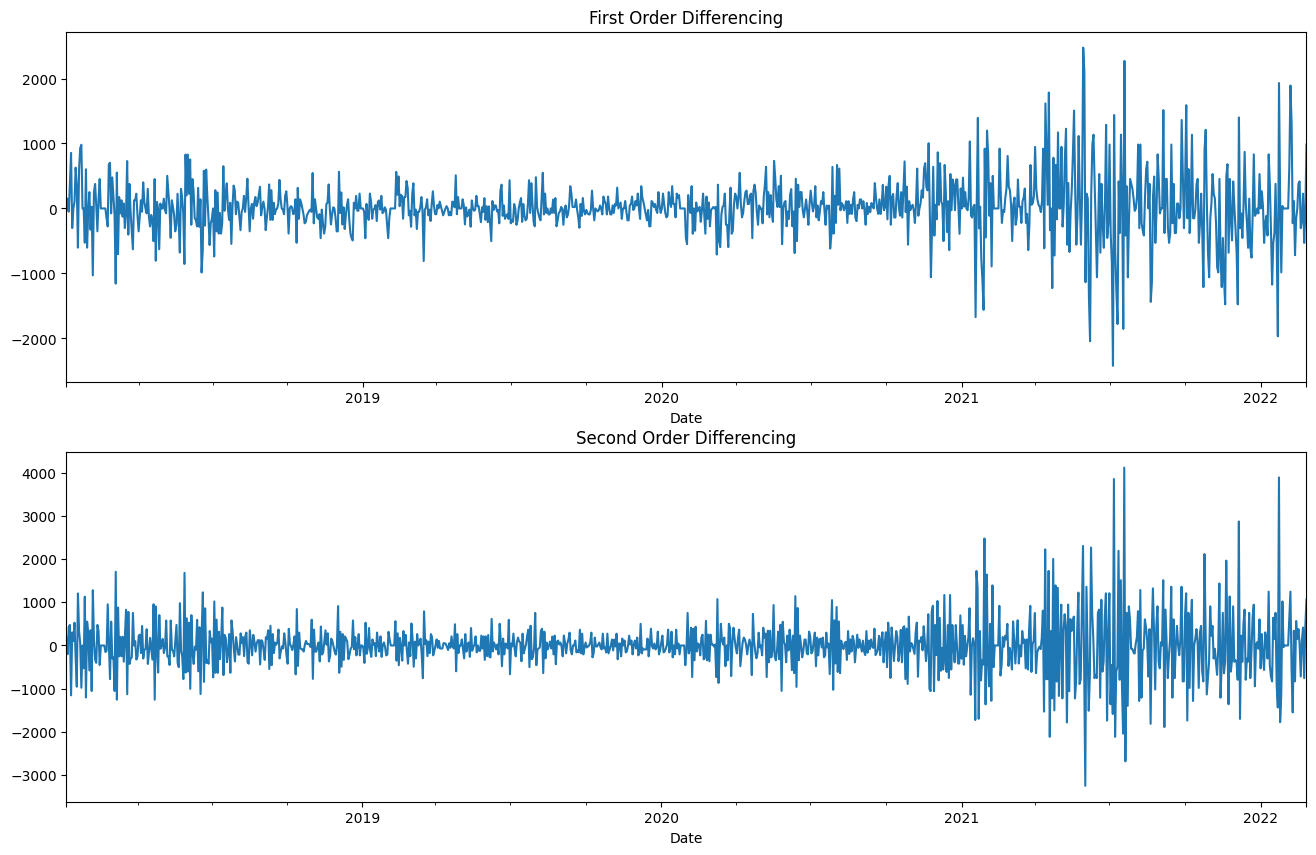

In [20]:
fig,axs = plt.subplots(2,1,figsize=(16,10))

first_diff = df1["Price"].diff()
first_diff.plot(ax=axs[0]).autoscale(axis='x',tight=True)
axs[0].set_title("First Order Differencing")

second_diff = first_diff.diff()
second_diff.plot(ax=axs[1]).autoscale(axis='x',tight=True)
axs[1].set_title("Second Order Differencing")

In [21]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [22]:
adf_test(first_diff,title="ADF Test on First Order Differenced Series:")
print("\n")
adf_test(second_diff,title="ADF Test on Second Order Differenced Series:")

Augmented Dickey-Fuller Test: ADF Test on First Order Differenced Series:
ADF test statistic       -7.7854928429
p-value                   0.0000000000
# lags used              12.0000000000
# observations         1071.0000000000
critical value (1%)      -3.4364704878
critical value (5%)      -2.8642424166
critical value (10%)     -2.5682088635
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: ADF Test on Second Order Differenced Series:
ADF test statistic      -12.4711653055
p-value                   0.0000000000
# lags used              22.0000000000
# observations         1060.0000000000
critical value (1%)      -3.4365341571
critical value (5%)      -2.8642705000
critical value (10%)     -2.5682238208
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The series are made stationary after the first order of differencing

In [26]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df1["Price"],m=5,seasonal=True, #Weekly seasonality
                        error_action="ignore",
                        suppress_warnings=True,
                        stepwise=True,trace=True,
                        max_d=1)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=16308.658, Time=7.32 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=16311.257, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=16314.866, Time=0.70 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=16314.820, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=16311.853, Time=0.16 sec
 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=16308.526, Time=6.55 sec
 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=16309.681, Time=2.52 sec
 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=16306.957, Time=12.70 sec
 ARIMA(2,1,2)(1,0,2)[5] intercept   : AIC=16303.548, Time=8.81 sec
 ARIMA(2,1,2)(2,0,2)[5] intercept   : AIC=16308.198, Time=6.20 sec
 ARIMA(2,1,2)(2,0,1)[5] intercept   : AIC=16302.765, Time=6.52 sec
 ARIMA(2,1,2)(2,0,0)[5] intercept   : AIC=inf, Time=5.68 sec
 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=16308.713, Time=2.85 sec
 ARIMA(1,1,2)(2,0,1)[5] intercept   : AIC=16315.353, Time=3.43 sec
 ARIMA(2,1,1)(2,0,1)[5] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1085
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 5)   Log Likelihood               -8143.240
Date:                            Sun, 16 Jun 2024   AIC                          16300.479
Time:                                    10:25:28   BIC                          16335.398
Sample:                                01-02-2018   HQIC                         16313.699
                                     - 02-28-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7090      0.025    -27.865      0.000      -0.759      -0.659
ar.L2         -0.9344      0.022    -42.270      0.000      -0.978      -0.891
ma.L1          0.7524      0.026     29.030      0.000       0.702       0.803
ma.L2          0.9253      0.028     32.875      0.000       0.870       0.980
ar.S.L5        0.0169      0.021      0.802      0.423      -0.024       0.058
ar.S.L10      -0.1005      0.022     -4.661      0.000      -0.143      -0.058
sigma2      1.998e+05   4893.501     40.828      0.000     1.9e+05    2.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1167.46
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.90   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df1["Price"],m=21,seasonal=True, #Monthly seasonality
                        error_action="ignore",
                        suppress_warnings=True,
                        stepwise=True,trace=True,
                        max_d=1)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[21] intercept   : AIC=16303.510, Time=23.11 sec
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=16311.257, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=16310.201, Time=2.26 sec
 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=16310.842, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=16311.853, Time=0.10 sec
 ARIMA(2,1,2)(0,0,1)[21] intercept   : AIC=16305.552, Time=13.25 sec
 ARIMA(2,1,2)(1,0,0)[21] intercept   : AIC=16304.580, Time=7.85 sec
 ARIMA(2,1,2)(2,0,1)[21] intercept   : AIC=16303.210, Time=26.47 sec
 ARIMA(2,1,2)(2,0,0)[21] intercept   : AIC=16301.234, Time=27.22 sec
 ARIMA(1,1,2)(2,0,0)[21] intercept   : AIC=16307.699, Time=9.85 sec
 ARIMA(2,1,1)(2,0,0)[21] intercept   : AIC=16307.473, Time=10.38 sec
 ARIMA(3,1,2)(2,0,0)[21] intercept   : AIC=16306.926, Time=21.37 sec
 ARIMA(2,1,3)(2,0,0)[21] intercept   : AIC=inf, Time=47.77 sec
 ARIMA(1,1,1)(2,0,0)[21] intercept   : AIC=16307.298, Time=10.05 sec
 AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1085
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 21)   Log Likelihood               -8143.595
Date:                             Sun, 16 Jun 2024   AIC                          16301.190
Time:                                     10:31:42   BIC                          16336.109
Sample:                                 01-02-2018   HQIC                         16314.409
                                      - 02-28-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0903      0.025      3.664      0.000       0.042       0.139
ar.L2         -0.9533      0.025    -38.665      0.000      -1.002      -0.905
ma.L1         -0.0754      0.030     -2.528      0.011      -0.134      -0.017
ma.L2          0.9244      0.030     30.336      0.000       0.865       0.984
ar.S.L21      -0.0816      0.023     -3.618      0.000      -0.126      -0.037
ar.S.L42       0.0765      0.025      3.060      0.002       0.028       0.126
sigma2      1.998e+05   4870.397     41.023      0.000     1.9e+05    2.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1277.37
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               5.05   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df1["Price"],m=21*3,seasonal=True, #Quarterly seasonality
                        error_action="ignore",
                        suppress_warnings=True,
                        stepwise=True,trace=True,
                        max_d=1)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[63] intercept   : AIC=16313.042, Time=59.37 sec
 ARIMA(0,1,0)(0,0,0)[63] intercept   : AIC=16311.257, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[63] intercept   : AIC=16314.863, Time=6.00 sec
 ARIMA(0,1,1)(0,0,1)[63] intercept   : AIC=16314.852, Time=6.04 sec
 ARIMA(0,1,0)(0,0,0)[63]             : AIC=16311.853, Time=0.06 sec
 ARIMA(0,1,0)(1,0,0)[63] intercept   : AIC=16313.058, Time=5.87 sec
 ARIMA(0,1,0)(0,0,1)[63] intercept   : AIC=16313.063, Time=8.20 sec
 ARIMA(0,1,0)(1,0,1)[63] intercept   : AIC=inf, Time=26.33 sec
 ARIMA(1,1,0)(0,0,0)[63] intercept   : AIC=16313.082, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[63] intercept   : AIC=16313.068, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[63] intercept   : AIC=16314.861, Time=0.46 sec

Best model:  ARIMA(0,1,0)(0,0,0)[63] intercept
Total fit time: 112.676 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1085
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8153.628
Date:                Sun, 16 Jun 2024   AIC                          16311.257
Time:                        10:33:35   BIC                          16321.234
Sample:                    01-02-2018   HQIC                         16315.034
                         - 02-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     21.8922     13.605      1.609      0.108      -4.773      48.557
sigma2      1.999e+05   4433.650     45.094      0.000    1.91e+05    2.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              1386.11
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               5.09   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Since with `m=5` and `m=21` <i>(weekly & quarterly seasonality, respectively)</i> generate so far the two lowest AIC stats, both can be deployed for model fitting

## Fit and Compare SARIMAX(2, 1, 2)x(2, 0, 0, 5) & SARIMAX(2, 1, 2)x(2, 0, 0, 21) Model

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(df1['Price'],order=(2,1,2),seasonal_order=(2,0,0,5),enforce_invertibility=False)
model2 = SARIMAX(df1['Price'],order=(2,1,2),seasonal_order=(2,0,0,21),enforce_invertibility=False)

results1 = model1.fit()
results2 = model2.fit()

In [30]:
start=len(df1)
end=start+len(df2)-1

predictions1 = results1.predict(start=start, end=end, dynamic=False).rename('SARIMAX(2, 1, 2)x(2, 0, [], 5) Predictions')

predictions2 = results2.predict(start=start, end=end, dynamic=False).rename('SARIMAX(2, 1, 2)x(2, 0, [], 21) Predictions')

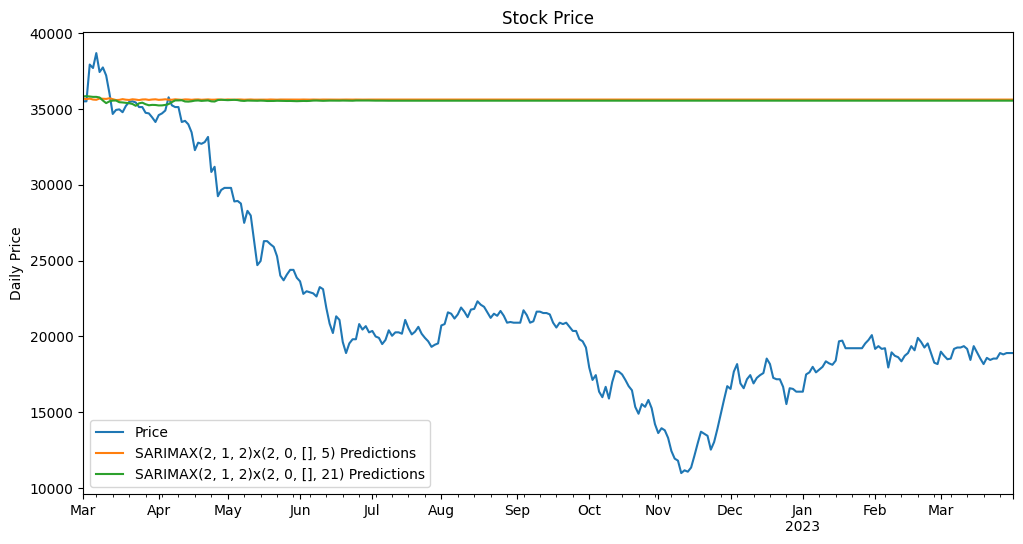

In [31]:
title='Stock Price'
ylabel='Daily Price'
xlabel=''

ax = df2['Price'].plot(legend=True,figsize=(12,6),title=title)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

In [32]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(df2["Price"], predictions1)
error2 = mse(df2["Price"], predictions2)

print(f'SARIMAX(2, 1, 2)x(2, 0, [], 5) MSE Error: {error1:11.10}')
print(f'SARIMAX(2, 1, 2)x(2, 0, [], 21) MSE Error: {error2:11.10}')

SARIMAX(2, 1, 2)x(2, 0, [], 5) MSE Error: 232704654.3
SARIMAX(2, 1, 2)x(2, 0, [], 21) MSE Error: 230703955.8


## Add the exog variable

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model1x = SARIMAX(df1['Price'],exog=df1["Vol."].fillna(method="ffill"),order=(2,1,2),seasonal_order=(2,0,0,5))
model2x = SARIMAX(df1['Price'],exog=df1["Vol."].fillna(method="ffill"),order=(2,1,2),seasonal_order=(2,0,0,21))

results1x = model1x.fit()
results2x = model2x.fit()

results1x.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1085
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 5)   Log Likelihood               -8146.263
Date:                            Sun, 16 Jun 2024   AIC                          16308.525
Time:                                    10:34:45   BIC                          16348.433
Sample:                                01-02-2018   HQIC                         16323.633
                                     - 02-28-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Vol.       -3.871e-06   8.17e-07     -4.737      0.000   -5.47e-06   -2.27e-06
ar.L1         -0.5013      0.272     -1.841      0.066      -1.035       0.032
ar.L2         -0.7291      0.231     -3.161      0.002      -1.181      -0.277
ma.L1          0.5158      0.280      1.844      0.065      -0.032       1.064
ma.L2          0.7043      0.242      2.914      0.004       0.231       1.178
ar.S.L5       -0.0271      0.022     -1.249      0.211      -0.070       0.015
ar.S.L10      -0.0609      0.024     -2.550      0.011      -0.108      -0.014
sigma2      1.982e+05    6.5e-06   3.05e+10      0.000    1.98e+05    1.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1288.59
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               5.24   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.37e+25. Standard errors may be unstable.
"""

In [34]:
results2x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                 1085
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 21)   Log Likelihood               -8142.250
Date:                             Sun, 16 Jun 2024   AIC                          16300.501
Time:                                     10:34:45   BIC                          16340.408
Sample:                                 01-02-2018   HQIC                         16315.609
                                      - 02-28-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Vol.       -3.914e-06   8.18e-07     -4.786      0.000   -5.52e-06   -2.31e-06
ar.L1         -0.5013      0.230     -2.176      0.030      -0.953      -0.050
ar.L2         -0.7291      0.218     -3.342      0.001      -1.157      -0.301
ma.L1          0.5158      0.236      2.181      0.029       0.052       0.979
ma.L2          0.7043      0.228      3.092      0.002       0.258       1.151
ar.S.L21      -0.0692      0.024     -2.890      0.004      -0.116      -0.022
ar.S.L42       0.0915      0.024      3.809      0.000       0.044       0.139
sigma2      1.982e+05   2.31e-06   8.58e+10      0.000    1.98e+05    1.98e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1345.76
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               5.15   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+26. Standard errors may be unstable.
"""

In [35]:
# Obtain predicted values
start=len(df1)
end=start+len(df2)-1

df2['Vol.']=df2['Vol.'].fillna(method="ffill")

exog_forecast = df2[['Vol.']]
predictions1x = results1x.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(2, 1, 2)x(2, 0, [], 5) Predictions')
predictions2x = results2x.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(2, 1, 2)x(2, 0, [], 21) Predictions')

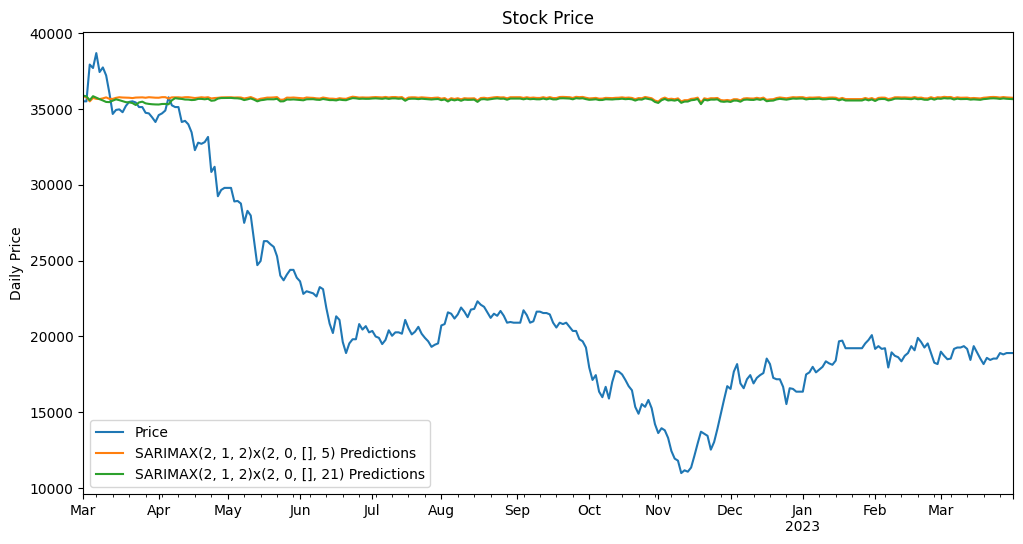

In [36]:
title='Stock Price'
ylabel='Daily Price'
xlabel=''

ax = df2['Price'].plot(legend=True,figsize=(12,6),title=title)
predictions1x.plot(legend=True)
predictions2x.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

In [38]:
from statsmodels.tools.eval_measures import mse,rmse

error1x = mse(df2["Price"], predictions1x)
error2x = mse(df2["Price"], predictions2x)

print(f'SARIMAX(2, 1, 2)x(2, 0, [], 5) MSE Error: {error1x:11.10}')
print(f'SARIMAX(2, 1, 2)x(2, 0, [], 21) MSE Error: {error2x:11.10}')

SARIMAX(2, 1, 2)x(2, 0, [], 5) MSE Error: 235406572.2
SARIMAX(2, 1, 2)x(2, 0, [], 21) MSE Error: 232830795.9


The MSE Errors of both predictions with the consideration of `Volume` as exogenous variable are higher as compared to the previous results, which might mean there should not be any causality between the indices and corresponding stock prices